![Whiteboard[2]-01.png](attachment:d4314ea5-6e83-403b-b88e-74fd777fa854.png)
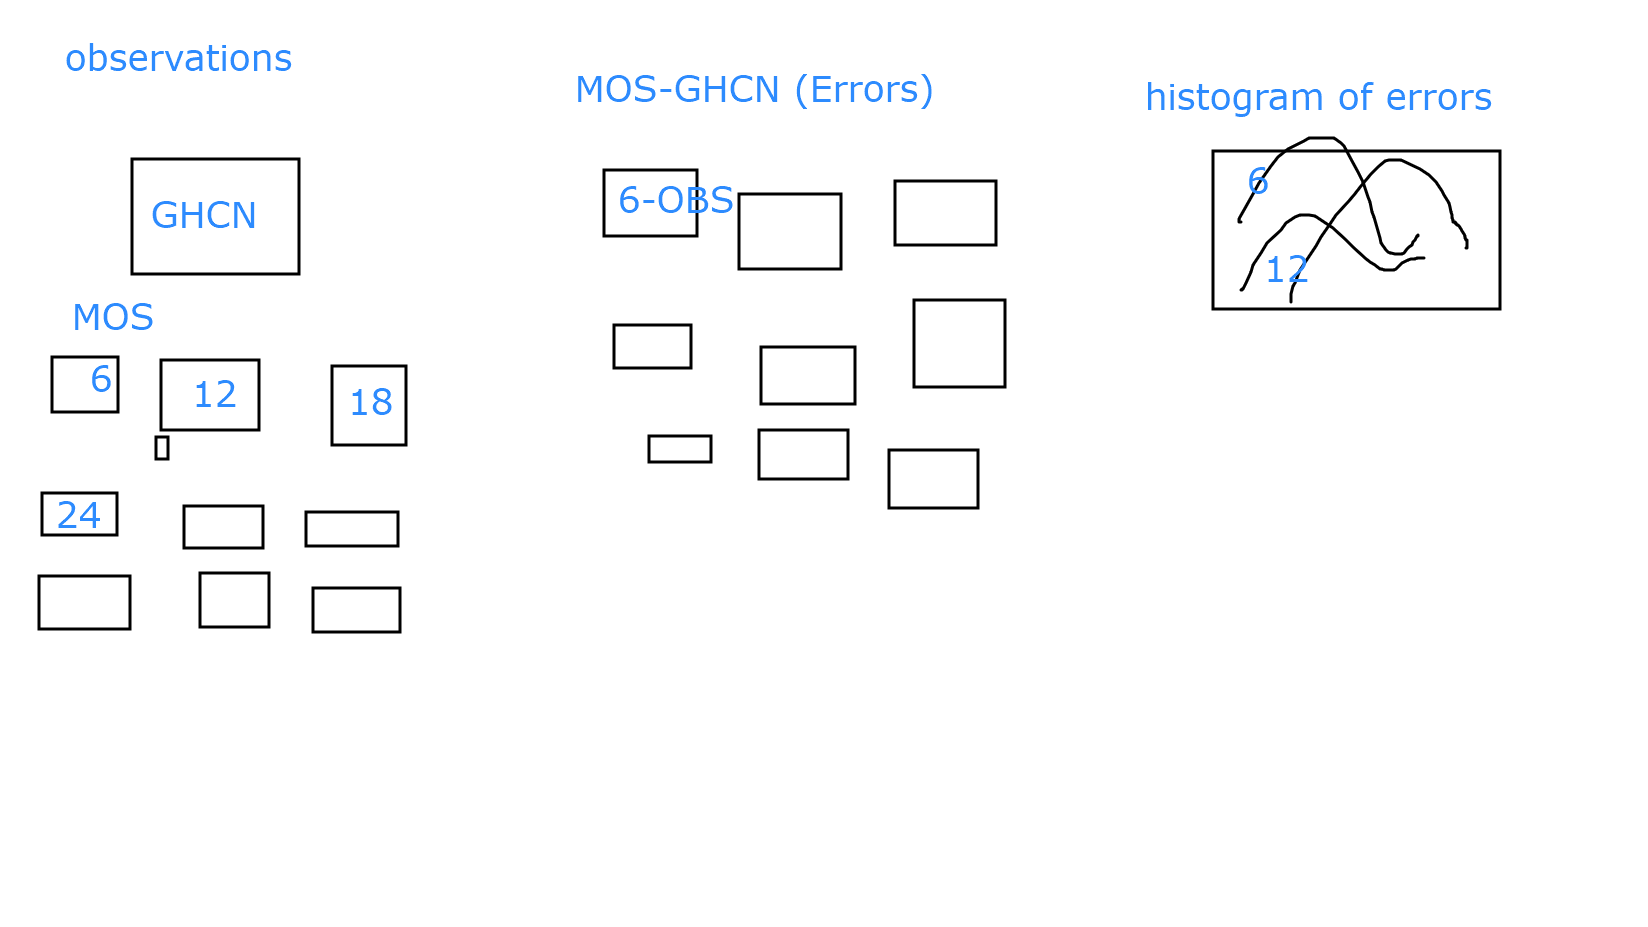

In [2]:
%matplotlib inline

import dask.dataframe as dd
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

Read in GHCN

In [3]:
YEAR = 2018
names = ['ID', 'DATE', 'ELEMENT', 'DATA_VALUE', 'M-FLAG', 'Q-FLAG', 'S-FLAG', 'OBS-TIME']
ds = dd.read_csv(f's3://noaa-ghcn-pds/csv/{YEAR}.csv', storage_options={'anon':True},  
                 names=names, parse_dates=['DATE'], dtype={'DATA_VALUE':'object'})

In [4]:
slookup = pd.read_csv('ghcn_mos_lookup.csv')

Filter down to stations in US, just the columns we need for visualization, and just the TAVG variable

In [6]:
ghcn = ds[['ID', 'DATE', 'ELEMENT', 'DATA_VALUE']][ds['ID'].isin(slookup['ID']) & ds['ELEMENT'].str.match('TAVG')].compute()

In [9]:
ghcn.head()

,ID,DATE,ELEMENT,DATA_VALUE
62630,USC00244558,2018-01-01,TAVG,-132
86717,USW00003017,2018-01-01,TAVG,-113
86980,USW00003170,2018-01-01,TAVG,11
87124,USW00003810,2018-01-01,TAVG,-60
87145,USW00003812,2018-01-01,TAVG,-80


Turn this into a station by date table

In [10]:
ghcnt = ghcn.pivot(index='DATE', columns='ID', values='DATA_VALUE')
ghcnt.head()

ID,USC00244558,USW00003017,USW00003170,USW00003810,USW00003812,USW00003813,USW00003816,USW00003820,USW00003822,USW00003847,...,USW00094814,USW00094822,USW00094823,USW00094830,USW00094846,USW00094847,USW00094849,USW00094860,USW00094908,USW00094910
DATE,,,,,,,,,,,,,,,,,,,,,
2018-01-01,-132,-113,11,-60,-80,17,-123,12,22,-117,...,-143,-214,-147,-140,-189,-137,-163,-126,-242,-253
2018-01-02,-105,-60,-6,-72,-83,-33,-126,-36,-21,-111,...,-112,-213,-132,-161,-191,-129,-89,-100,-230,-232
2018-01-03,-91,-1,-4,-56,-53,-13,-79,-26,-21,-64,...,-100,-120,-122,-133,-114,-137,-88,-122,-133,-133
2018-01-04,-71,14,22,-48,-58,-1,-83,-10,-19,-79,...,-151,-172,-93,-112,-139,-112,-156,-108,-178,-186
2018-01-05,-41,24,23,-66,-87,-10,-69,-5,3,-108,...,-199,-182,-154,-155,-152,-169,-187,-166,-177,-166


In [20]:
# Compute our station order, which is how we're gonna compare one against the other

In [24]:
mos_0 = pd.read_csv('mos2018/MOS_2018_0_days_06:00:00.csv')[['station', 'runtime','TMP']]
mos_0.head()

,station,runtime,TMP
0,PHBK,2018-06-01 18:00:00+00:00,77.0
1,PHHI,2018-06-01 18:00:00+00:00,79.0
2,PHJH,2018-06-01 18:00:00+00:00,81.0
3,PHJR,2018-06-01 18:00:00+00:00,82.0
4,PHKO,2018-06-01 18:00:00+00:00,84.0


In [25]:
mos_0.head()

,station,runtime,TMP
0,PHBK,2018-06-01 18:00:00+00:00,77.0
1,PHHI,2018-06-01 18:00:00+00:00,79.0
2,PHJH,2018-06-01 18:00:00+00:00,81.0
3,PHJR,2018-06-01 18:00:00+00:00,82.0
4,PHKO,2018-06-01 18:00:00+00:00,84.0


In [28]:
in_both = (slookup['ID'].isin(ghcnt.columns) & slookup['Station'].isin(mos_0['station'].unique()))
station_order = slookup[['ID','Station']][in_both]

In [29]:
station_order.head()

,ID,Station
27,USC00244558,KGPI
32,USW00093904,KFTW
71,USW00022516,PHOG
73,USW00022536,PHLI
79,USW00023232,KSAC


# Lets get the GHCN observations in the same order & Plot

In [51]:
ghcnt[station_order['ID']].head()

ID,USC00244558,USW00093904,USW00022516,USW00022536,USW00023232,USW00003017,USW00003170,USW00003810,USW00003812,USW00003813,...,USW00094814,USW00094822,USW00094823,USW00094830,USW00094846,USW00094847,USW00094849,USW00094860,USW00094908,USW00094910
DATE,,,,,,,,,,,,,,,,,,,,,
2018-01-01,-132,-56,211,226,95,-113,11,-60,-80,17,...,-143,-214,-147,-140,-189,-137,-163,-126,-242,-253
2018-01-02,-105,-43,213,228,88,-60,-6,-72,-83,-33,...,-112,-213,-132,-161,-191,-129,-89,-100,-230,-232
2018-01-03,-91,-10,223,233,99,-1,-4,-56,-53,-13,...,-100,-120,-122,-133,-114,-137,-88,-122,-133,-133
2018-01-04,-71,35,204,233,127,14,22,-48,-58,-1,...,-151,-172,-93,-112,-139,-112,-156,-108,-178,-186
2018-01-05,-41,77,225,232,130,24,23,-66,-87,-10,...,-199,-182,-154,-155,-152,-169,-187,-166,-177,-166


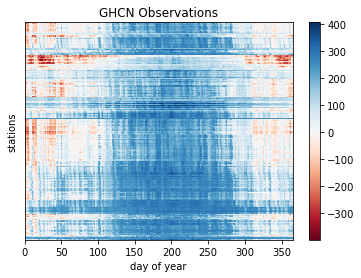

In [78]:
fig, ax = plt.subplots()
ax.set_title("GHCN Observations")
im = ax.pcolormesh(ghcnt[station_order['ID']].values.astype(float).T, cmap='RdBu')
ax.set(ylabel="stations", xlabel="day of year")
ax.set_yticklabels([]) # removed individual station ids cause not super helpful here
ax.tick_params(axis='y', length=0)
fig.colorbar(im, ax=ax)

# Plot GFS MAV 6 hour ahead

Open our first prediction (0 days), pivot and line it up w/ GHCN

In [53]:
df = pd.read_csv('mos2018/MOS_2018_0_days_06:00:00.csv',
                 parse_dates=['runtime', 'ftime']).drop_duplicates()

In [54]:
#somehow there's a row where the header names got repeated
df.drop(df[df['station'].str.match('station')].index, inplace=True)

In [59]:
#filter & convert
dfc = df[['station', 'TMP']].astype({'TMP':float})
dfc['runtime'] = pd.to_datetime(df['runtime'])

In [61]:
# we have 4xDAY we predicted out, so let's average to one prediction per day 
dfc['runtime'].unique()

<DatetimeArray>
['2018-06-01 18:00:00+00:00', '2018-06-02 18:00:00+00:00',
 '2018-06-03 18:00:00+00:00', '2018-06-04 18:00:00+00:00',
 '2018-06-05 18:00:00+00:00', '2018-06-06 18:00:00+00:00',
 '2018-06-07 18:00:00+00:00', '2018-06-08 18:00:00+00:00',
 '2018-06-09 18:00:00+00:00', '2018-06-10 18:00:00+00:00',
 ...
 '2018-10-22 12:00:00+00:00', '2018-10-23 12:00:00+00:00',
 '2018-10-24 12:00:00+00:00', '2018-10-25 12:00:00+00:00',
 '2018-10-26 12:00:00+00:00', '2018-10-27 12:00:00+00:00',
 '2018-10-28 12:00:00+00:00', '2018-10-29 12:00:00+00:00',
 '2018-10-30 12:00:00+00:00', '2018-10-31 12:00:00+00:00']
Length: 1460, dtype: datetime64[ns, UTC]

We need to for each station, take the average of the 4 predictions per day. We're going to end up w/ a table that is structured like our GHCN one above

In [75]:
mos_0_table = dfc.groupby(['station', pd.Grouper(freq='D', key='runtime')]).mean().unstack()['TMP'].T

In [76]:
mos_0_table.head()

station,K04W,K08D,K1V4,K2WX,K8A0,K9V9,KAAF,KABE,KABI,KABQ,...,PHJH,PHJR,PHKO,PHLI,PHMK,PHNG,PHNL,PHOG,PHSF,PHTO
runtime,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00+00:00,-7.00,-12.0,-9.25,-11.25,18.00,-12.25,41.75,12.00,16.25,38.75,...,536.00,69.25,73.25,73.25,70.75,74.50,74.00,70.00,55.00,70.50
2018-01-02 00:00:00+00:00,1.75,5.5,-7.00,13.75,18.75,6.75,35.25,16.50,19.00,40.25,...,535.25,72.00,74.00,72.25,70.75,74.25,74.75,70.25,55.25,69.25
2018-01-03 00:00:00+00:00,2.25,6.5,11.00,21.50,26.50,14.75,37.50,16.50,34.25,39.75,...,535.00,69.00,73.00,73.50,69.75,74.00,74.00,71.00,52.75,70.25
2018-01-04 00:00:00+00:00,-4.00,9.5,10.75,26.50,22.75,10.25,35.75,21.25,38.50,42.00,...,535.75,69.75,72.25,73.50,70.50,74.00,74.75,70.25,52.50,70.75
2018-01-05 00:00:00+00:00,-6.75,8.5,4.50,19.25,23.00,7.75,36.25,12.75,46.25,42.25,...,535.25,68.75,72.25,73.00,69.50,74.00,74.25,71.50,56.00,71.00


Same plotting code, now just with most table in place of ghcn

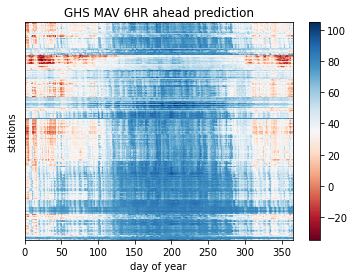

In [79]:
fig, ax = plt.subplots()
ax.set_title("GHS MAV 6HR ahead prediction")
im = ax.pcolormesh(mos_0_table[station_order['Station']].values.astype(float).T, cmap='RdBu')
ax.set(ylabel="stations", xlabel="day of year")
ax.set_yticklabels([]) # removed individual station ids cause not super helpful here
ax.tick_params(axis='y', length=0)
fig.colorbar(im, ax=ax)

# To do:
repeat  plot GFS MAV 6 hour ahead for 
* MOS_2018_0_days_06:00:00.csv  
* MOS_2018_0_days_09:00:00.csv  
* MOS_2018_0_days_12:00:00.csv
* MOS_2018_0_days_15:00:00.csv  
* MOS_2018_0_days_18:00:00.csv  
* MOS_2018_0_days_21:00:00.csv  
* MOS_2018_1_days_00:00:00.csv  
* MOS_2018_1_days_03:00:00.csv  
* MOS_2018_1_days_06:00:00.csv  
* MOS_2018_1_days_09:00:00.csv  
* MOS_2018_1_days_12:00:00.csv 
* MOS_2018_1_days_15:00:00.csv
* MOS_2018_1_days_18:00:00.csv
* MOS_2018_1_days_21:00:00.csv
* MOS_2018_2_days_00:00:00.csv
* MOS_2018_2_days_03:00:00.csv
* MOS_2018_2_days_06:00:00.csv
* MOS_2018_2_days_09:00:00.csv
* MOS_2018_2_days_12:00:00.csv
* MOS_2018_2_days_18:00:00.csv
* MOS_2018_368_days_00:00:00.csv
* MOS_2018_3_days_00:00:00.csv

You can ignore those last two for now